# TRATAMENTOS DOS DADOS<br>

> ## Micro dados inep: dataset Escolas.csv

In [1]:
diretorio_datasets = "/home/matteus-paula/Downloads/dados_tcc/inep"
#diretorio_datasets = "/home/caioabreu/workspace/tcc/datasets/inep"

Inclusão da biblioteca Pandas do Python para exploratoria e analise dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dados_escolas = pd.read_csv(f'{diretorio_datasets}/ESCOLAS.CSV', 
                            delimiter="|", encoding = "ISO-8859-1")

/home/matteus-paula/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dados_escolas.head()

,NU_ANO_CENSO,CO_ENTIDADE,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
0,2017,50032062,CENTRO DE EDUCACAO INFANTIL GERALDO ANTONIO LOPES,NaN,1,06/02/2017,11/12/2017,5,5004,50010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,11016094,IEE MARECHAL RONDON,00007,1,06/02/2017,29/12/2017,1,1102,11004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,21079196,ESCOLA MUNICIPAL BARRO BRANCO,00004,1,21/02/2017,29/12/2017,2,2102,21008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,51062879,ESCOLA MUNICIPAL PROFESSORA MARIA LUIZA DE ARA...,51021,1,13/02/2017,21/12/2017,5,5104,51017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,31051659,EM JOSE LEOCADIO DOS SANTOS,00039,1,06/02/2017,15/12/2017,3,3108,31036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filtrando as escolas, de acordo com os filtros informados pela documentação: 
- O filtro TP_SITUACAO_FUNCIONAMENTO=1 diz respeito à escola que está Em atividade
- O filtro (IN_REGULAR=1 OR IN_EJA=1 OR IN_PROFISSIONALIZANTE=1) diz respeito às escolas com pelo menos uma matrícula em turma de Escolarização.

In [5]:
escolas = dados_escolas.loc[(dados_escolas['TP_SITUACAO_FUNCIONAMENTO'] == 1) 
                      & (
                          (dados_escolas['IN_REGULAR'] == 1)
                            |(dados_escolas['IN_EJA'] == 1
                             |(dados_escolas['IN_PROFISSIONALIZANTE'] == 1))
                      )]

## Filtrando somente as escolas do ensino Publico

In [6]:
escolas = escolas.loc[(escolas['TP_DEPENDENCIA'] >= 1) & (escolas['TP_DEPENDENCIA'] <= 3)]
escolas.head()

,NU_ANO_CENSO,CO_ENTIDADE,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
0,2017,50032062,CENTRO DE EDUCACAO INFANTIL GERALDO ANTONIO LOPES,NaN,1,06/02/2017,11/12/2017,5,5004,50010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,11016094,IEE MARECHAL RONDON,00007,1,06/02/2017,29/12/2017,1,1102,11004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,21079196,ESCOLA MUNICIPAL BARRO BRANCO,00004,1,21/02/2017,29/12/2017,2,2102,21008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,51062879,ESCOLA MUNICIPAL PROFESSORA MARIA LUIZA DE ARA...,51021,1,13/02/2017,21/12/2017,5,5104,51017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,31051659,EM JOSE LEOCADIO DOS SANTOS,00039,1,06/02/2017,15/12/2017,3,3108,31036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- ### Seleção das variaveis a serem estudadas

In [7]:
df_all = escolas[['CO_ENTIDADE', 'TP_DEPENDENCIA', 
                  'CO_UF', 'CO_MUNICIPIO',
                  'IN_COMUM_PRE', 'IN_COMUM_FUND_AI', 
                  'IN_COMUM_FUND_AF', 'IN_COMUM_MEDIO_NORMAL',
                  'IN_COMUM_MEDIO_MEDIO', 'IN_COMUM_MEDIO_INTEGRADO', 
                  'IN_AGUA_INEXISTENTE', 'IN_AGUA_FILTRADA', 
                  'IN_ESGOTO_INEXISTENTE','IN_BIBLIOTECA_SALA_LEITURA',
                 'IN_BANHEIRO_FORA_PREDIO', 'IN_BANHEIRO_DENTRO_PREDIO', 
                 'IN_REFEITORIO', 'IN_AUDITORIO',
                 'IN_COMPUTADOR', 'IN_INTERNET',
                 'IN_BANDA_LARGA', 'IN_ALIMENTACAO',
                 'IN_PATIO_COBERTO', 'IN_PATIO_DESCOBERTO',
                 'IN_AREA_VERDE', 'IN_LABORATORIO_CIENCIAS', 
                 'IN_LABORATORIO_INFORMATICA', 'IN_ENERGIA_INEXISTENTE', 
                 'IN_LIXO_RECICLA', 'IN_QUADRA_ESPORTES', 
                 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
                 'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
                 'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA',
                 'IN_DEPENDENCIAS_PNE', 'TP_ATIVIDADE_COMPLEMENTAR']]

- ### Verificando a variação e a distribuição dos dados

In [8]:
df_all.describe()

,CO_ENTIDADE,TP_DEPENDENCIA,CO_UF,CO_MUNICIPIO,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_NORMAL,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,...,IN_LIXO_RECICLA,IN_QUADRA_ESPORTES,IN_EQUIP_TV,IN_EQUIP_DVD,IN_EQUIP_PARABOLICA,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_EQUIP_MULTIMIDIA,IN_DEPENDENCIAS_PNE,TP_ATIVIDADE_COMPLEMENTAR
count,1.437820e+05,143782.000000,143782.000000,1.437820e+05,143782.000000,143782.000000,143782.000000,143782.000000,143782.000000,143782.000000,...,143782.000000,143782.00000,143782.000000,143782.000000,143782.000000,143782.000000,143782.000000,143782.000000,143782.000000,143782.000000
mean,2.968824e+07,2.780863,29.538085,2.967516e+06,0.533530,0.638717,0.339903,0.007699,0.133313,0.012025,...,0.056662,0.32262,0.784208,0.715402,0.220069,0.379449,0.618881,0.562150,0.268615,0.274464
std,9.897888e+06,0.423368,9.896127,9.934654e+05,0.498876,0.480374,0.473678,0.087407,0.339914,0.108998,...,0.231197,0.46748,0.411372,0.451224,0.414295,0.485252,0.485663,0.496124,0.443241,0.446245
min,1.100002e+07,1.000000,11.000000,1.100015e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.213150e+07,3.000000,22.000000,2.210953e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.935059e+07,3.000000,29.000000,2.926202e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,3.523308e+07,3.000000,35.000000,3.537602e+06,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.306824e+07,3.000000,53.000000,5.300108e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- ### Verificando os dados omissos

In [9]:
df_all.isnull().any()

CO_ENTIDADE                   False
TP_DEPENDENCIA                False
CO_UF                         False
CO_MUNICIPIO                  False
IN_COMUM_PRE                  False
IN_COMUM_FUND_AI              False
IN_COMUM_FUND_AF              False
IN_COMUM_MEDIO_NORMAL         False
IN_COMUM_MEDIO_MEDIO          False
IN_COMUM_MEDIO_INTEGRADO      False
IN_AGUA_INEXISTENTE           False
IN_AGUA_FILTRADA              False
IN_ESGOTO_INEXISTENTE         False
IN_BIBLIOTECA_SALA_LEITURA    False
IN_BANHEIRO_FORA_PREDIO       False
IN_BANHEIRO_DENTRO_PREDIO     False
IN_REFEITORIO                 False
IN_AUDITORIO                  False
IN_COMPUTADOR                 False
IN_INTERNET                   False
IN_BANDA_LARGA                False
IN_ALIMENTACAO                False
IN_PATIO_COBERTO              False
IN_PATIO_DESCOBERTO           False
IN_AREA_VERDE                 False
IN_LABORATORIO_CIENCIAS       False
IN_LABORATORIO_INFORMATICA    False
IN_ENERGIA_INEXISTENTE      

- ### Verificando dados duplicados

In [10]:
print(df_all['CO_ENTIDADE'].count())
print(df_all['CO_ENTIDADE'].drop_duplicates().count())

143782
143782


In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143782 entries, 0 to 246577
Data columns (total 38 columns):
CO_ENTIDADE                   143782 non-null int64
TP_DEPENDENCIA                143782 non-null int64
CO_UF                         143782 non-null int64
CO_MUNICIPIO                  143782 non-null int64
IN_COMUM_PRE                  143782 non-null float64
IN_COMUM_FUND_AI              143782 non-null float64
IN_COMUM_FUND_AF              143782 non-null float64
IN_COMUM_MEDIO_NORMAL         143782 non-null float64
IN_COMUM_MEDIO_MEDIO          143782 non-null float64
IN_COMUM_MEDIO_INTEGRADO      143782 non-null float64
IN_AGUA_INEXISTENTE           143782 non-null float64
IN_AGUA_FILTRADA              143782 non-null float64
IN_ESGOTO_INEXISTENTE         143782 non-null float64
IN_BIBLIOTECA_SALA_LEITURA    143782 non-null float64
IN_BANHEIRO_FORA_PREDIO       143782 non-null float64
IN_BANHEIRO_DENTRO_PREDIO     143782 non-null float64
IN_REFEITORIO                 143

<br>

<br>

# ANALISES<br>

In [12]:
escolas_federais = escolas.loc[(escolas['TP_DEPENDENCIA'] == 1)]
print(escolas_federais['CO_ENTIDADE'].count())

escolas_estaduais = escolas.loc[(escolas['TP_DEPENDENCIA'] == 2)]
print(escolas_estaduais['CO_ENTIDADE'].count())

escolas_municipais = escolas.loc[(escolas['TP_DEPENDENCIA'] == 3)]
print(escolas_municipais['CO_ENTIDADE'].count())


# EDUCAÇÃO BASICA

# 611 ESCOLAS DE NIVEL FEDERAL 
# 30.175 ESCOLAS DE NIVEL ESTADUAL
# 110.177 ESCOLAS DE NIVEL MUNICIPAL
# 38.470 ESCOLAS DE NIVEL PRIVADA

584
30340
112858


In [13]:
df_all.loc[df_all['IN_AGUA_INEXISTENTE'] == 1, 'IN_AGUA_EXISTENTE'] = 0
df_all.loc[df_all['IN_AGUA_INEXISTENTE'] == 0, 'IN_AGUA_EXISTENTE'] = 1

df_all['IN_AGUA_EXISTENTE'].count()

/home/matteus-paula/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/matteus-paula/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


143782

In [14]:
df_all.loc[df_all['IN_ENERGIA_INEXISTENTE'] == 1, 'IN_ENERGIA_EXISTENTE'] = 0
df_all.loc[df_all['IN_ENERGIA_INEXISTENTE'] == 0, 'IN_ENERGIA_EXISTENTE'] = 1

df_all['IN_ENERGIA_EXISTENTE'].count()

143782

In [15]:
df_all.loc[df_all['IN_ESGOTO_INEXISTENTE'] == 1, 'IN_ESGOTO_EXISTENTE'] = 0
df_all.loc[df_all['IN_ESGOTO_INEXISTENTE'] == 0, 'IN_ESGOTO_EXISTENTE'] = 1

df_all['IN_ESGOTO_EXISTENTE'].count()

143782

In [16]:
# Transformando as variaveis de ensino fundamental em uma unica variavel
df_all.loc[(df_all['IN_COMUM_FUND_AI'] == 1) | (df_all['IN_COMUM_FUND_AF'] == 1), 'IN_COMUM_FUND'] = 1
df_all.loc[(df_all['IN_COMUM_FUND_AI'] == 0) & (df_all['IN_COMUM_FUND_AF'] == 0), 'IN_COMUM_FUND'] = 0

# Transformando as variaveis de ensino medio em uma unica variavel
df_all.loc[(df_all['IN_COMUM_MEDIO_NORMAL'] == 1) 
           | (df_all['IN_COMUM_MEDIO_MEDIO'] == 1)
           | (df_all['IN_COMUM_MEDIO_INTEGRADO'] == 1), 'IN_COMUM_MEDIO'] = 1

df_all.loc[(df_all['IN_COMUM_MEDIO_NORMAL'] == 0) 
           & (df_all['IN_COMUM_MEDIO_MEDIO'] == 0)
           & (df_all['IN_COMUM_MEDIO_INTEGRADO'] == 0), 'IN_COMUM_MEDIO'] = 0

In [17]:
# Transformando as variaveis de BANHEIRO em uma unica variavel
df_all.loc[(df_all['IN_BANHEIRO_FORA_PREDIO'] == 1) | (df_all['IN_BANHEIRO_DENTRO_PREDIO'] == 1), 'IN_BANHEIRO'] = 1
df_all.loc[(df_all['IN_BANHEIRO_FORA_PREDIO'] == 0) & (df_all['IN_BANHEIRO_DENTRO_PREDIO'] == 0), 'IN_BANHEIRO'] = 0

In [18]:
# Transformando as variaveis de PATIO em uma unica variavel

df_all.loc[(df_all['IN_PATIO_COBERTO'] == 1) | (df_all['IN_PATIO_DESCOBERTO'] == 1), 'IN_PATIO'] = 1
df_all.loc[(df_all['IN_PATIO_COBERTO'] == 0) & (df_all['IN_PATIO_DESCOBERTO'] == 0), 'IN_PATIO'] = 0

In [19]:
df_final = df_all[
                ['CO_MUNICIPIO','CO_UF',
                 'IN_AGUA_EXISTENTE', 'IN_AGUA_FILTRADA', 
                 'IN_ESGOTO_EXISTENTE','IN_BIBLIOTECA_SALA_LEITURA',
                 'IN_BANHEIRO', 'IN_REFEITORIO', 'IN_AUDITORIO',
                 'IN_COMPUTADOR', 'IN_INTERNET',
                 'IN_BANDA_LARGA', 'IN_ALIMENTACAO',
                 'IN_PATIO','IN_AREA_VERDE', 'IN_LABORATORIO_CIENCIAS', 
                 'IN_LABORATORIO_INFORMATICA', 'IN_ENERGIA_EXISTENTE', 
                 'IN_LIXO_RECICLA', 'IN_QUADRA_ESPORTES',
                 'IN_DEPENDENCIAS_PNE', 'TP_ATIVIDADE_COMPLEMENTAR']
                ].groupby(['CO_MUNICIPIO', 'CO_UF'], as_index=False) \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_final.head()

,CO_MUNICIPIO,CO_UF,IN_AGUA_EXISTENTE,IN_AGUA_FILTRADA,IN_ESGOTO_EXISTENTE,IN_BIBLIOTECA_SALA_LEITURA,IN_BANHEIRO,IN_REFEITORIO,IN_AUDITORIO,IN_COMPUTADOR,...,IN_ALIMENTACAO,IN_PATIO,IN_AREA_VERDE,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_ENERGIA_EXISTENTE,IN_LIXO_RECICLA,IN_QUADRA_ESPORTES,IN_DEPENDENCIAS_PNE,TP_ATIVIDADE_COMPLEMENTAR
0,1100015,11,100.0,100.0,94.12,26.47,85.29,23.53,0.00,52.94,...,100.0,58.82,2.94,5.88,14.71,91.18,2.94,41.18,11.76,2.94
1,1100023,11,100.0,100.0,100.00,68.42,100.00,81.58,44.74,100.00,...,100.0,94.74,36.84,18.42,73.68,100.00,5.26,68.42,50.00,47.37
2,1100031,11,100.0,100.0,100.00,25.00,75.00,62.50,0.00,100.00,...,100.0,62.50,12.50,0.00,25.00,100.00,37.50,50.00,12.50,12.50
3,1100049,11,100.0,100.0,97.96,40.82,97.96,57.14,12.24,97.96,...,100.0,79.59,46.94,14.29,36.73,100.00,4.08,44.90,38.78,26.53
4,1100056,11,100.0,100.0,100.00,28.57,100.00,21.43,14.29,100.00,...,100.0,100.00,50.00,7.14,28.57,100.00,7.14,57.14,42.86,21.43


In [20]:
df_final.count()

CO_MUNICIPIO                  5570
CO_UF                         5570
IN_AGUA_EXISTENTE             5570
IN_AGUA_FILTRADA              5570
IN_ESGOTO_EXISTENTE           5570
IN_BIBLIOTECA_SALA_LEITURA    5570
IN_BANHEIRO                   5570
IN_REFEITORIO                 5570
IN_AUDITORIO                  5570
IN_COMPUTADOR                 5570
IN_INTERNET                   5570
IN_BANDA_LARGA                5570
IN_ALIMENTACAO                5570
IN_PATIO                      5570
IN_AREA_VERDE                 5570
IN_LABORATORIO_CIENCIAS       5570
IN_LABORATORIO_INFORMATICA    5570
IN_ENERGIA_EXISTENTE          5570
IN_LIXO_RECICLA               5570
IN_QUADRA_ESPORTES            5570
IN_DEPENDENCIAS_PNE           5570
TP_ATIVIDADE_COMPLEMENTAR     5570
dtype: int64

In [21]:
df_final.to_csv(f'{diretorio_datasets}/escolas_set.csv', sep=';', encoding='utf-8', index=False)

<br>

In [234]:
df = df_all.pivot_table(columns='TP_DEPENDENCIA', values=['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_ENERGIA_EXISTENTE', 
              'IN_BANHEIRO','IN_REFEITORIO', 'IN_ALIMENTACAO',
             'IN_BIBLIOTECA_SALA_LEITURA', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET', 'IN_BANDA_LARGA', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_LIXO_RECICLA', 'IN_AREA_VERDE',
             'IN_PATIO', 'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA'], aggfunc=lambda x: round((x.sum() * 100) / x.count(), 2) )
df

TP_DEPENDENCIA,1,2,3,4
IN_AGUA_EXISTENTE,100.00,98.97,95.74,99.97
IN_AGUA_FILTRADA,92.31,81.87,84.52,97.48
IN_ALIMENTACAO,74.96,99.22,99.80,32.17
IN_AREA_VERDE,75.61,31.70,26.85,30.95
IN_AUDITORIO,80.20,16.34,5.58,17.18
IN_BANDA_LARGA,95.09,76.77,47.36,85.17
IN_BANHEIRO,99.67,93.78,94.98,94.76
IN_BIBLIOTECA_SALA_LEITURA,97.71,79.24,36.13,69.18
IN_COMPUTADOR,99.84,93.66,73.88,96.62
IN_ENERGIA_EXISTENTE,100.00,98.53,96.54,100.00


In [235]:
df_2 = df_all.where(df_all['IN_COMUM_FUND'] == 1)

df_2 = df_2[['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_BIBLIOTECA_SALA_LEITURA',
             'IN_BANHEIRO', 
             'IN_REFEITORIO', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET',
             'IN_BANDA_LARGA', 'IN_ALIMENTACAO', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_ENERGIA_EXISTENTE', 'IN_LIXO_RECICLA',
             'IN_AREA_VERDE','IN_PATIO',
             'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA']] \
            .apply(lambda x: round((x.sum() * 100) / x.count(),2))
df_2

IN_AGUA_FILTRADA              84.93
IN_AGUA_EXISTENTE             96.29
IN_BIBLIOTECA_SALA_LEITURA    55.24
IN_BANHEIRO                   95.05
IN_REFEITORIO                 35.05
IN_AUDITORIO                  10.60
IN_COMPUTADOR                 79.68
IN_INTERNET                   69.22
IN_BANDA_LARGA                57.20
IN_ALIMENTACAO                83.71
IN_LABORATORIO_CIENCIAS       11.65
IN_LABORATORIO_INFORMATICA    44.13
IN_ENERGIA_EXISTENTE          96.70
IN_LIXO_RECICLA                6.13
IN_AREA_VERDE                 26.86
IN_PATIO                      68.41
IN_QUADRA_ESPORTES            41.98
IN_EQUIP_TV                   77.83
IN_EQUIP_DVD                  69.05
IN_EQUIP_PARABOLICA           22.40
IN_EQUIP_COPIADORA            43.99
IN_EQUIP_IMPRESSORA           64.27
IN_EQUIP_MULTIMIDIA           62.48
dtype: float64

In [239]:
df_4 = df_all.where(df_all['IN_COMUM_MEDIO'] == 1)

print("Total de escolas ensino medio: " + str(df_4['CO_ENTIDADE'].count()))

df_4 = df_4[['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_BIBLIOTECA_SALA_LEITURA',
             'IN_BANHEIRO', 
             'IN_REFEITORIO', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET',
             'IN_BANDA_LARGA', 'IN_ALIMENTACAO', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_ENERGIA_EXISTENTE', 'IN_LIXO_RECICLA', 
             'IN_AREA_VERDE', 'IN_PATIO',
             'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA']] \
            .apply(lambda x: round((x.sum() * 100) / x.count(), 2))
df_4

Total de escolas ensino medio: 28646


IN_AGUA_FILTRADA              89.06
IN_AGUA_EXISTENTE             99.62
IN_BIBLIOTECA_SALA_LEITURA    87.51
IN_BANHEIRO                   96.46
IN_REFEITORIO                 47.50
IN_AUDITORIO                  28.60
IN_COMPUTADOR                 97.67
IN_INTERNET                   95.07
IN_BANDA_LARGA                84.88
IN_ALIMENTACAO                72.87
IN_LABORATORIO_CIENCIAS       44.08
IN_LABORATORIO_INFORMATICA    78.14
IN_ENERGIA_EXISTENTE          99.81
IN_LIXO_RECICLA                9.60
IN_AREA_VERDE                 35.49
IN_PATIO                      79.20
IN_QUADRA_ESPORTES            75.91
IN_EQUIP_TV                   90.51
IN_EQUIP_DVD                  73.69
IN_EQUIP_PARABOLICA           36.85
IN_EQUIP_COPIADORA            59.72
IN_EQUIP_IMPRESSORA           80.81
IN_EQUIP_MULTIMIDIA           89.13
dtype: float64

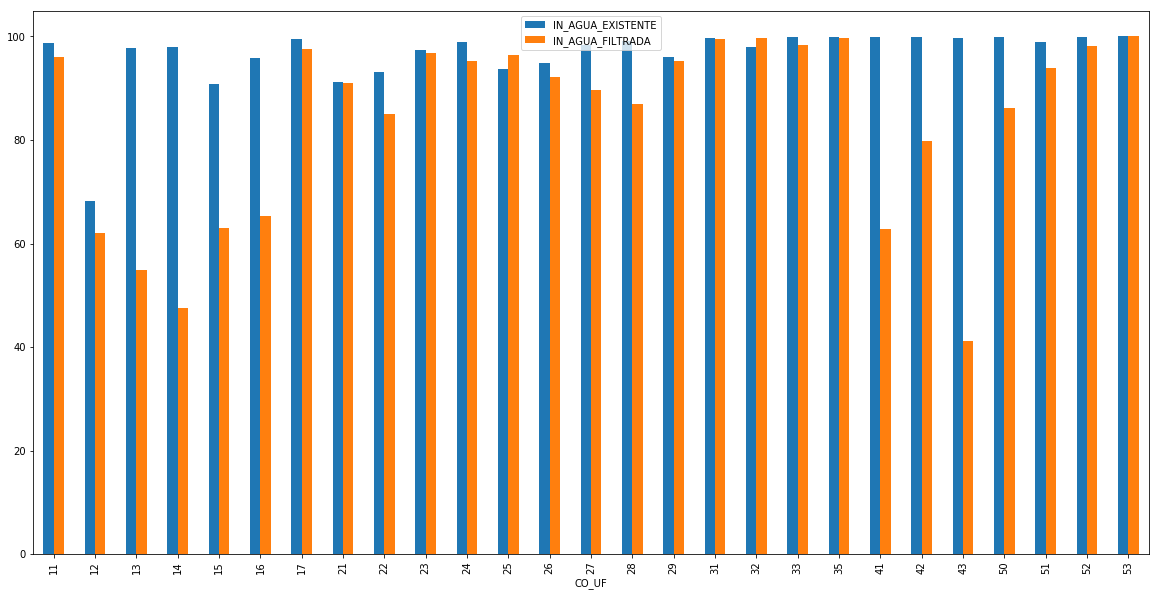

In [195]:
df_5 = df_all[['CO_UF', 'IN_AGUA_EXISTENTE', 'IN_AGUA_FILTRADA']].groupby('CO_UF') \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_5.plot(kind='bar', figsize=(20,10))

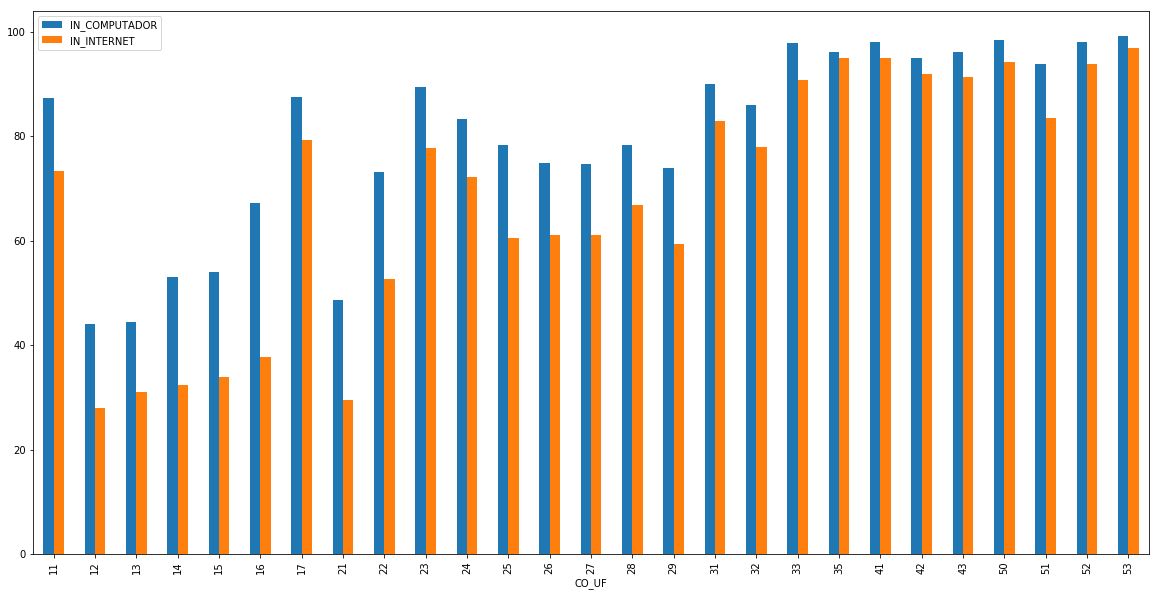

In [197]:
df_5 = df_all[['CO_UF', 'IN_COMPUTADOR', 'IN_INTERNET']].groupby('CO_UF') \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_5.plot(kind='bar', figsize=(20,10))